### Pipeline gerarchica

**PIPELINE - APPROCCIO GERARCHICO**

Contributo algoritmico per semplificare il grafo trovando strutture ripetitive-ricorsive al suo interno.

Procedura:

```
Rinominare nodi del grafo G con il livello corrispondente. Tupla: (livello, nodo)
Identificare sottografo motif nel grafo G (definiti nel file pattern.ipynb)
Collassare il motif in un solo nodo
Memorizzare quali nodi si comprimono nel nuovo nodo
(Aggiornare il peso e il colore degli archi)
Riapplicare il procedimento al grafo risultante (nuovo livello)
```

In [1]:
import networkx as nx
from grandiso import find_motifs

In [2]:
%load_ext pycodestyle_magic
# %%pycodestyle

#### Grafo test di base `G`

In [65]:
# grafo test di base G

G0 = nx.Graph()
G0.add_edges_from([(1, 2), (2, 3), (2, 4), (2, 5), (4, 5), (3, 6), (4, 6), (5, 6)])
# nx.draw(G)

In [66]:
def rinomina(G):
    livello = 0
    nodi = list(G.nodes())
    lun = len(nodi)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, nodi))
    mapping = dict(zip(nodi, lista_tuple))
    G = nx.relabel_nodes(G, mapping)
    
    return G

G0 = rinomina(G0)
G0.nodes()

NodeView(((0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6)))

In [67]:
# utile per avere una lista di soli nodi: [1, 2, 3, 4, 5, 6]
# nodi = list(G_rin.nodes()) 
# nodi = [x[1] for x in nodi] 
# nodi

#### Sottografo `motif`

In [68]:
# Sottografo motif da trovare nel grafo G: TRIANGOLO

motif = nx.Graph()
motif.add_edges_from([(1, 2), (2, 3), (3, 1)])
# nx.draw(motif)

In [69]:
# Sottografo motif da trovare nel grafo G: QUADRATO

# motif1 = nx.Graph()
# motif1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
# nx.draw(motif1)

***

La funzione `identify` prende in input un grafo `G` e un sottografo `motif`, chiama la funzione `find_motifs` della libreria grandiso che sostituisce una lista di dizionari in cui ogni dizionario è un `motif` trovato in `G` e converte l'output in lista di uniche liste.

***

### procedura su grafo rinominato

In [70]:
def identify(motif, G):
    lista1 = find_motifs(motif, G)
    lista2 = [list(d.values()) for d in lista1]
    lista3 = list(set(tuple(sorted(s)) for s in lista2))
    lista4 = sorted(lista3)
    risultato = [list(el) for el in lista4] 
    risultato = [x[1] for x in risultato[0]] # mi interessa solo il primo match

    return [risultato]

In [71]:
ris = identify(motif, G0)
ris

[[2, 4, 5]]

la comprimi non mi piace. Chiama al suo interno la identify, il livello e il nome del grafo vanno cambiati

In [72]:
def comprimi_rinomina(G, livello):
    ris = identify(motif, G)
    nodi = list(G.nodes())
    nodi = [x[1] for x in nodi]
    lun = len(nodi)
    lista_temp = []
    for x in nodi:
        if x in ris[0]:
            lista_temp.append(ris[0][0])
        else:
            lista_temp.append(x)
    liv_list = [livello for x in range(lun)]
    lista_tuple = list(zip(liv_list, lista_temp))
    mapping = dict(zip(nodi, lista_tuple))
    
    return mapping

In [73]:
liv = 0
mapp = comprimi_rinomina(G0, liv)
mapp

{1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (0, 2), 5: (0, 2), 6: (0, 6)}

In [84]:
# Rinomino archi del grafo
# derinomina
def rinomina_archi(G):
    archi = list(G.edges())
    archi2 = []
    for i in archi:
        print(i)
        archi2.append((i[0][1], i[1][1]))
    G = nx.Graph()
    G.add_edges_from(archi2)
    
    return G
G0 = rinomina_archi(G0)
G0.nodes()

TypeError: 'int' object is not subscriptable

[(0, 1), (0, 2), (0, 3), (0, 6)]


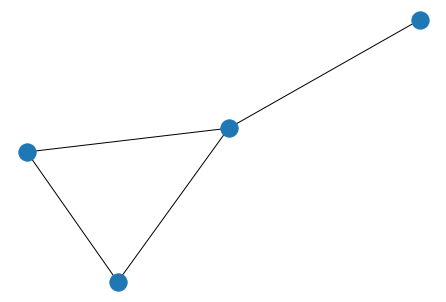

In [83]:
G1 = nx.relabel_nodes(G0, mapp)
print(G1.nodes())
nx.draw(G1)

In [44]:
ris = identify(motif, G1)
ris

[[2, 3, 6]]

In [45]:
liv = 1
mapp = comprimi_rinomina(G1, liv)
mapp

{1: (1, 1), 2: (1, 2), 3: (1, 2), 6: (1, 2)}

In [46]:
# Rinomino archi del grafo

archi = list(G1.edges())
archi2 = []
for i in archi:
    archi2.append((i[0][1], i[1][1]))
G1 = nx.Graph()
G1.add_edges_from(archi2)
# nx.draw(G1)

[(1, 1), (1, 2)]


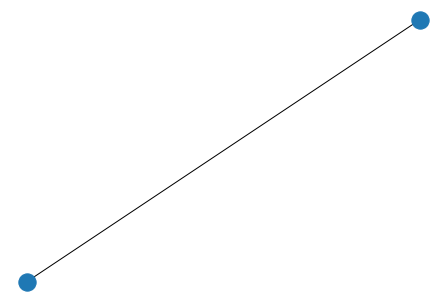

In [47]:
G2 = nx.relabel_nodes(G1, mapp3)
print(G2.nodes())
nx.draw(G2)

***

In [11]:
ris = identify(motif, G_rin)
ris

[[(0, 4), (0, 5), (0, 6)], [(0, 2), (0, 4), (0, 5)]]

In [23]:
G1.nodes()

NodeView((1, 2, 3, 4, 5, 6))

In [24]:
ris = identify(motif, G1)
ris

[[2, 4, 5], [4, 5, 6]]

In [25]:
ris = identify(motif, G2)
ris

[]

***

In [12]:
def comprimi_rinomina():
    livello = 0
    #ris = identify(motif, G) # [[2, 4, 5], [4, 5, 6]]
    nodi = list(G0.nodes()) # [1, 2, 3, 4, 5, 6]
    lun = len(nodi) # 6
    lista_temp = nodi[:]
    for x in lista_temp:
        if x in ris[0]:
            lista_temp[x-1] = ris[0][0]
    lista_temp # [1, 2, 3, 2, 2, 6]
    liv_list = [livello for x in range(lun)] # [0, 0, 0, 0, 0, 0]
    lista_tuple = list(zip(liv_list, lista_temp)) # [(0,1),(0,2),(0,3),(0,2)(0,2),(0,6)]
    mapping = dict(zip(nodi, lista_tuple))
    
    return mapping
    

In [13]:
mapp = comprimi_rinomina()
mapp

{1: (0, 1), 2: (0, 2), 3: (0, 3), 4: (0, 2), 5: (0, 2), 6: (0, 6)}

In [ ]:
# variante per lista_temp
for x in lista_temp:
    if x in ris[0]:
        print(lista_temp[x-1])
        lista_temp[lun-1] = ris[0][0]
lista_temp

In [29]:
print(G0.nodes())

[1, 2, 3, 4, 5, 6]


[(0, 1), (0, 2), (0, 3), (0, 6)]


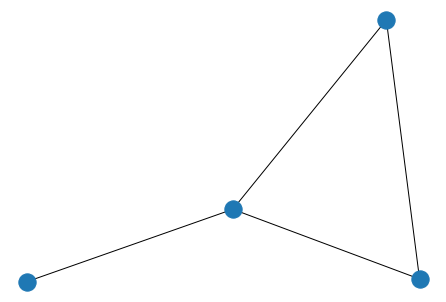

In [19]:
G1 = nx.relabel_nodes(G0, mapp)
print(G1.nodes())
nx.draw(G1)

In [20]:
ris2 = identify(motif, G1)
ris2

[[(0, 2), (0, 3), (0, 6)]]

#### Seconda iterazione

In [21]:
def comprimi_rinomina2():
    livello2 = 1
    ris2 = identify(motif, G1) 
    ris2  = [val for sublist in ris2 for val in sublist]
    ris2 = [x[1] for x in ris2]
    ris2 = [ris2] # [[2, 3, 6]]
    nodi2 = list(G1.nodes()) # (1, 1), (1, 2), (1, 3), (1, 6)
    nodi2 = [x[1] for x in nodi2] # [1, 2, 3, 6]
    lun2 = len(nodi2) # 4
    lista_temp2 = [] # [1, 2, 2, 2]
    for x in nodi2:
        if x in ris2[0]:
            lista_temp2.append(ris2[0][0])
        else:
            lista_temp2.append(x)
    liv_list2 = [livello2 for x in range(lun2)] # [1, 1, 1, 1]
    lista_tuple2 = list(zip(liv_list2, lista_temp2)) #[(1,1),(1,2),(1,2),(1,2)]
    mapping2 = dict(zip(nodi2, lista_tuple2))
    
    return mapping2
mapp2 = comprimi_rinomina2()
mapp2

{1: (1, 1), 2: (1, 2), 3: (1, 2), 6: (1, 2)}

In [22]:
mapp2 = comprimi_rinomina2()
mapp2

{1: (1, 1), 2: (1, 2), 3: (1, 2), 6: (1, 2)}

In [23]:
# tentativo per lista_temp2
a = [1, 2, 3, 6]
b = [2, 3, 6]
c = []
for x in a:
    if x in b:
        c.append(b[0])
        #print(b[0])
    else:
        c.append(x)
        #print(x)
c

[1, 2, 2, 2]

In [24]:
# Rinomino archi del grafo

archi = list(G1.edges())
archi2 = []
for i in archi:
    archi2.append((i[0][1], i[1][1]))
G1 = nx.Graph()
G1.add_edges_from(archi2)
# nx.draw(G1)

[(1, 1), (1, 2)]


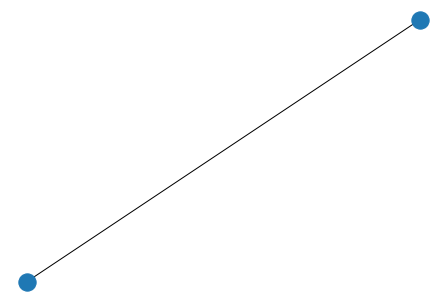

In [25]:
G2 = nx.relabel_nodes(G1, mapp2)
print(G2.nodes())
nx.draw(G2)